In [34]:
#Basic libraries
import pandas as pd 
import numpy as np 

#Visualization libraries
import matplotlib.pyplot as plt 
from matplotlib import rcParams
import seaborn as sns

#NLTK libraries
import nltk
import re
import string
from nltk.corpus import stopwords
from wordcloud import WordCloud,STOPWORDS
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
# Machine Learning libraries
import sklearn 
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

#Metrics libraries
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

#Miscellanous libraries
from collections import Counter

#Ignore warnings
import warnings
warnings.filterwarnings('ignore')


In [35]:
#Loading The Dataset
fake = pd.read_csv("Fake.csv")
true = pd.read_csv("True.csv")

In [36]:
fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [37]:
true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [38]:
#Target variable for fake news
fake['temp']=0

#Target variable for true news
true['temp']=1

In [39]:
#Concatenating and dropping for fake news
fake['news']=fake['title']+fake['text']
fake=fake.drop(['title', 'text'], axis=1)

#Concatenating and dropping for true news
true['news']=true['title']+true['text']
true=true.drop(['title', 'text'], axis=1)

#Rearranging the columns
fake = fake[['subject', 'date', 'news','temp']]
true = true[['subject', 'date', 'news','temp']]


In [40]:
fake['date'].value_counts()

date
May 10, 2017         46
May 26, 2016         44
May 6, 2016          44
May 5, 2016          44
May 11, 2016         43
                     ..
December 9, 2017      1
December 4, 2017      1
November 19, 2017     1
November 20, 2017     1
Jul 19, 2015          1
Name: count, Length: 1681, dtype: int64

In [41]:
frames = [fake, true]
news_dataset = pd.concat(frames)
news_dataset

,subject,date,news,temp
0,News,"December 31, 2017",Donald Trump Sends Out Embarrassing New Year’...,0
1,News,"December 31, 2017",Drunk Bragging Trump Staffer Started Russian ...,0
2,News,"December 30, 2017",Sheriff David Clarke Becomes An Internet Joke...,0
3,News,"December 29, 2017",Trump Is So Obsessed He Even Has Obama’s Name...,0
4,News,"December 25, 2017",Pope Francis Just Called Out Donald Trump Dur...,0
...,...,...,...,...
21412,worldnews,"August 22, 2017",'Fully committed' NATO backs new U.S. approach...,1
21413,worldnews,"August 22, 2017",LexisNexis withdrew two products from Chinese ...,1
21414,worldnews,"August 22, 2017",Minsk cultural hub becomes haven from authorit...,1
21415,worldnews,"August 22, 2017",Vatican upbeat on possibility of Pope Francis ...,1


In [42]:
clean_news=news_dataset.copy()

In [43]:
clean_news.to_csv("clean_news.csv", index=False)


In [44]:
def review_cleaning(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [45]:
clean_news['news']=clean_news['news'].apply(lambda x:review_cleaning(x))
clean_news.head()

,subject,date,news,temp
0,News,"December 31, 2017",donald trump sends out embarrassing new year’...,0
1,News,"December 31, 2017",drunk bragging trump staffer started russian ...,0
2,News,"December 30, 2017",sheriff david clarke becomes an internet joke...,0
3,News,"December 29, 2017",trump is so obsessed he even has obama’s name...,0
4,News,"December 25, 2017",pope francis just called out donald trump dur...,0


In [46]:
stop = stopwords.words('english')
clean_news['news'] = clean_news['news'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
clean_news.head()

,subject,date,news,temp
0,News,"December 31, 2017",donald trump sends embarrassing new year’s eve...,0
1,News,"December 31, 2017",drunk bragging trump staffer started russian c...,0
2,News,"December 30, 2017",sheriff david clarke becomes internet joke thr...,0
3,News,"December 29, 2017",trump obsessed even obama’s name coded website...,0
4,News,"December 25, 2017",pope francis called donald trump christmas spe...,0


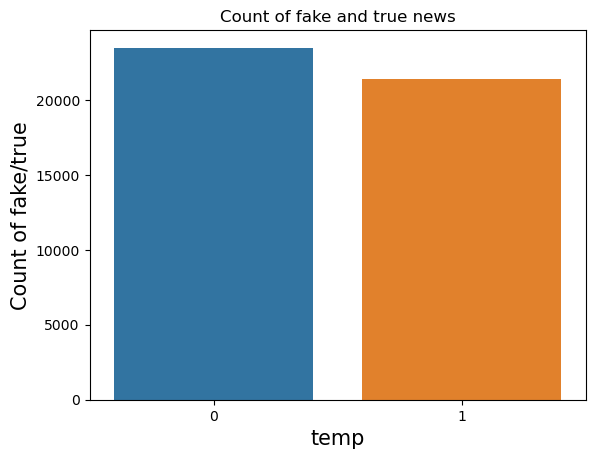

In [47]:
ax=sns.countplot(x="temp", data=clean_news)

#Setting labels and font size
ax.set(xlabel='temp', ylabel='Count of fake/true',title='Count of fake and true news')
ax.xaxis.get_label().set_fontsize(15)
ax.yaxis.get_label().set_fontsize(15)

In [48]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import plotly.express as px  # Make sure you have Plotly installed

def get_top_n_words(corpus, n=None):
    vec = TfidfVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]

# Calling function and return only top 20 words
common_words = get_top_n_words(clean_news['news'], 20)

# Printing the word and frequency
for word, freq in common_words:
    print(word, freq)

# Creating the dataframe of word and frequency
df1 = pd.DataFrame(common_words, columns=['news', 'tfidf'])

# Group by words and plot the sum using Plotly Express
fig = px.bar(df1.groupby('news').sum()['tfidf'].sort_values(ascending=False),
             y='tfidf',
             labels={'tfidf': 'TF-IDF'},
             title='Top 20 words in news (TF-IDF)',
             color=df1.groupby('news').sum()['tfidf'].sort_values(ascending=False).index)
fig.show()


trump 2310.3458739231805
said 1557.8714592022577
us 1056.999130221545
president 869.4153702459125
would 799.824650687638
clinton 744.9334203608759
obama 717.3049860262851
people 675.4907827689402
house 657.0818322746131
state 632.3022257451825
republican 568.1509979595221
white 565.3075126783358
reuters 556.0214135075872
new 554.9267412770312
one 550.5272601815412
donald 550.5233620450555
hillary 537.8456339447127
government 524.7434464831699
states 510.74988169256926
united 484.91513325022885


In [49]:
#Extracting 'reviews' for processing
news_features=clean_news.copy()
news_features=news_features[['news']].reset_index(drop=True)
news_features.head()


,news
0,donald trump sends embarrassing new year’s eve...
1,drunk bragging trump staffer started russian c...
2,sheriff david clarke becomes internet joke thr...
3,trump obsessed even obama’s name coded website...
4,pope francis called donald trump christmas spe...


In [64]:
news_features.to_csv("news_features.csv", index=False)


In [51]:
stop_words = set(stopwords.words("english"))
#Performing stemming on the review dataframe
ps = PorterStemmer()

#splitting and adding the stemmed words except stopwords
corpus = []
for i in range(0, len(news_features)):
    news = re.sub('[^a-zA-Z]', ' ', news_features['news'][i])
    news= news.lower()
    news = news.split()
    news = [ps.stem(word) for word in news if not word in stop_words]
    news = ' '.join(news)
    corpus.append(news)   

In [52]:
corpus[1]

'drunk brag trump staffer start russian collus investigationhous intellig committe chairman devin nune go bad day assumpt like mani us christoph steeledossi prompt russia investig lash depart justic fbi order protect trump happen dossier start investig accord document obtain new york timesform trump campaign advis georg papadopoulo drunk wine bar reveal knowledg russian opposit research hillari clintonon top papadopoulo covfef boy trump administr alleg much larger role none damn drunken fool wine bar coffe boy help arrang new york meet trump presid abdel fattah elsisi egypt two month elect known former aid set meet world leader trump team trump ran mere coffe boyin may papadopoulo reveal australian diplomat alexand downer russian offici shop around possibl dirt thendemocrat presidenti nomine hillari clinton exactli much mr papadopoulo said night kensington wine room australian alexand downer unclear report state two month later leak democrat email began appear onlin australian offici p

In [53]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000,ngram_range=(2,2))
# TF-IDF feature matrix
X= tfidf_vectorizer.fit_transform(news_features['news'])
X.shape

(44898, 5000)

In [54]:
y=clean_news['temp']

In [55]:
print(f'Original dataset shape : {Counter(y)}')

Original dataset shape : Counter({0: 23481, 1: 21417})


In [56]:
## Divide the dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [57]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i in range (cm.shape[0]):
        for j in range (cm.shape[1]):
            plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [58]:
logreg_cv = LogisticRegression(random_state=0)
knn_cv=KNeighborsClassifier()
cv_dict = {0: 'Logistic Regression', 1:'KNN'}
cv_models=[logreg_cv,knn_cv]
#Printing the accuracy
for i,model in enumerate(cv_models):
    print("{} Test Accuracy: {}".format(cv_dict[i],cross_val_score(model, X, y, cv=10, scoring ='accuracy').mean()))

Logistic Regression Test Accuracy: 0.9659893200950009
KNN Test Accuracy: 0.6119894709214952


In [59]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
pred_knn = knn.predict(X_test)

In [60]:
print(knn.score(X_test, y_test))
print(classification_report(y_test, pred_knn))

0.6556792873051225
              precision    recall  f1-score   support

           0       0.61      0.99      0.75      5876
           1       0.95      0.29      0.45      5349

    accuracy                           0.66     11225
   macro avg       0.78      0.64      0.60     11225
weighted avg       0.77      0.66      0.61     11225



Confusion matrix, without normalization


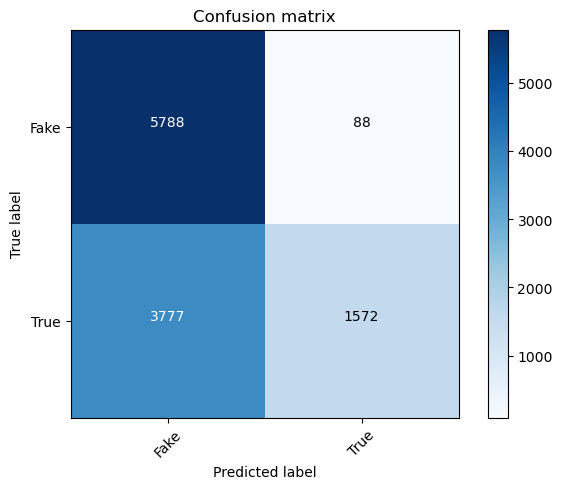

In [61]:
cm = metrics.confusion_matrix(y_test, pred_knn)
plot_confusion_matrix(cm, classes=['Fake','True'])

In [62]:
y_pred_prob_knn = knn.predict_proba(X_test)[:, 1]
print('ROC AUC Score for KNN:', roc_auc_score(y_test, y_pred_prob_knn))

ROC AUC Score for KNN: 0.6955292216622181
